Hierarchical clustering is a data mining technique used to group data points into a hierarchy of clusters. Unlike K-means which requires specifying the number of clusters beforehand, hierarchical clustering builds a hierarchy that you can then interpret to determine the number of clusters or explore the relationships between data points.<br><br>

Here's a breakdown of the two main approaches in hierarchical clustering:<br><br>

1. Agglomerative (Bottom-up):<br><br>

-- Starts by considering each data point as a separate cluster.<br>
--In each step, it merges the two closest clusters based on a distance metric (e.g., Euclidean distance).<br>
--The process continues until all data points belong to a single cluster.<br>
--The result is a tree-like structure called a dendrogram, where the height of a merge in the dendrogram represents the distance between the merged clusters.<br><br>
2. Divisive (Top-down):<br><br>

--Starts with all data points in a single cluster.<br>
--In each step, it recursively splits the most heterogeneous cluster into two sub-clusters.<br>
--The process continues until each cluster contains a single data point.<br>
--The result is also a dendrogram, but it represents the distance at which clusters were split.

In [18]:
# Load the Iris flower classification dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (flower type)

# Create a hierarchical clustering model with Ward linkage
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the data
model.fit(X)

# Get cluster labels for each data point
cluster_labels = model.labels_

# Print some results
print("Cluster labels:", cluster_labels)



Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


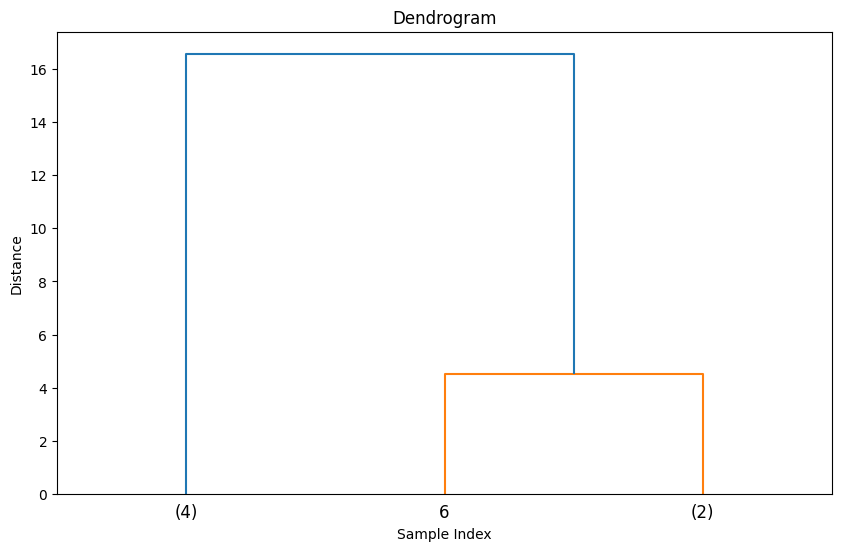

In [21]:
# Update the scipy.cluster.hierarchy module

# Import the necessary modules
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
X = [[1, 2], [3, 4], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]

# Linkage matrix calculation (important step)
distance_matrix = sch.distance.pdist(X)  # Calculate pairwise distances between data points
linkage_matrix = sch.linkage(distance_matrix, method='ward')  # Perform ward linkage clustering

# Optional: Define the number of clusters for cutting the dendrogram (can be adjusted)
n_clusters = 3

# Dendrogram plotting
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(linkage_matrix, no_plot=False, truncate_mode='lastp', p=n_clusters)  # Cut at n_clusters

# Customize dendrogram labels (optional)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [24]:
def divisive_clustering(data, distance_metric, k):
  """
  Performs divisive hierarchical clustering on the given data.

  Args:
      data: A list of data points (represented as lists or numpy arrays).
      distance_metric: A function that calculates the distance between two data points.
      k: The desired number of clusters.

  Returns:
      A list of clusters, where each cluster is a list of data points.
  """

  # Base case: If only one data point remains, return it as a cluster.
  if len(data) == 1:
    return [data]

  # Find the farthest pair of data points in the current data set.
  farthest_distance = float('-inf')
  farthest_i = None
  farthest_j = None
  for i in range(len(data)):
    for j in range(i + 1, len(data)):
      dist = distance_metric(data[i], data[j])
      if dist > farthest_distance:
        farthest_distance = dist
        farthest_i = i
        farthest_j = j

  # Split the data into two clusters based on the farthest pair.
  cluster1 = [data[i] for i in range(len(data)) if i != farthest_i and i != farthest_j]
  cluster2 = [data[farthest_i], data[farthest_j]]

  # Recursively cluster the two sub-clusters until k clusters are obtained.
  if k > 2:
    clusters1 = divisive_clustering(cluster1, distance_metric, k-1)
    clusters2 = divisive_clustering(cluster2, distance_metric, 1)  # Single cluster for the other half
    return clusters1 + clusters2
  else:
    return [cluster1, cluster2]

# Example usage (replace with your data and distance metric)
data = [[1, 2], [3, 4], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]

def euclidean_distance(p1, p2):
  return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

clusters = divisive_clustering(data, euclidean_distance, 3)

# Print the resulting clusters
print("Clusters:", clusters)


Clusters: [[[3, 4], [1.5, 1.8], [5, 8]], [[1, 2], [8, 8]], [], [[1, 0.6], [9, 11]]]
